# Assignment 1 -- ML4F 2023

## Instructions
* This assignment covers the material discussed in Lectures ML1 - ML4. 
* Each group submits _only one_ notebook via canvas on the assignment page. 
* The notebook should be named `assignment1_groupXX.ipynb` where `XX` is your group number,  
e.g. for group 3 this will be `assignment1_group03.ipynb`.
* The notebook should run without raising any errors. 
* We recommend keeping the folder structure
```
assignment/
    data/
    lib/
    assignment1_groupXX.ipynb
```
* We strongly recommend git, as you are encouraged to collaborate and split up the work and maybe even start independently. To see how to set up your own repo for your group, see `VU Workshop Introduction to Version Control with GIT.pptx` discussed in week 2.
* Do not spend time on optimizing the speed of your code. However, if it runs for more than 5 minutes, we will terminate it.
* We strongly encourage you to experiment, try different approaches and combinations and get to know the problem from alternative angles. But the final notebook should only contain the necessary results for grading.
----

<div style="font-size:24px; text-align:center; font-weight:bold">Good luck!</div>

----

# Assignment 1 - Features & Algorithms

Kiwibank, a commercial bank from New Zealand, is interested in updating their loan default prediction algorithm. They used to check each client manually, and now they want to use Machine Learning to predict who will default on their loan and pose a threat to the bank's balance sheet. They have supplied you with a dataset of their past clients, and they've asked you to consult them on their adaptation of Machine Learning in this process.

First take a look at the data, then test different algorithms, select key features and write a recommendation to the bank.

State your imports below.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, f1_score,roc_curve, auc,ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier,ElasticNet


This helps to print the dataframe more clear

In [2]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
pd.set_option('max_colwidth',100)

# Preprocessing (15 points)
*5 points for correct code*

*10 points for normalization procedure*

The data consists of 34 features and one target variable, 'Loan Status'
We have 25 numerical features and 9 categorical features. For the numerical features, apply a technique
to make the data more normal. This can be Standardization, Normalization, log or a Box-Cox transformation. 
Explain why you might use one method for some features, and another for other features.
Also check for missing values and uninformative features (NO FEATURE SELECTION YET).

In [3]:
df = pd.read_csv('data/8_ML4F_Assignment1Data.csv')

set 'object' data to dummies

In [4]:
for column in df.columns:
    if df[column].dtype == 'object': 
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])

The 'Home Ownership' data shifts to the 'Employment Duration' in the dataset, and itself has some unknown data, so we decide to shift 'Home Ownership' back and delete 'Employment Duration'. Also,ID and Batch Enrolled are just random numbers to identify clients, which is useless for prediction.

In [5]:
df['Home Ownership'] = df['Employment Duration'] 
df = df.drop(columns=['Unnamed: 0','ID','Batch Enrolled','Employment Duration'])

In [6]:
#drop leakage
#df = df.drop(columns=['Total Received Interest','Total Received Late Fee','Recoveries','Collection Recovery Fee'])

Drop imblanced features which has few variability. Threshold is that the amount of the largest class is above 95% in the feature 

In [7]:
for i in range(len(df.columns[:])): 
    col = df.columns[i]
    counts = df[col].value_counts()
    perc = np.max(counts)/np.sum(counts)
    print(df.columns[i],'%.2f%%' % (perc * 100))

Loan Amount 0.06%
Funded Amount 0.06%
Funded Amount Investor 0.01%
Term 65.46%
Interest Rate 0.01%
Grade 28.52%
Sub Grade 6.28%
Home Ownership 53.78%
Verification Status 49.83%
Payment Plan 100.00%
Loan Title 45.75%
Debit to Income 0.02%
Delinquency - two years 76.91%
Inquires - six months 90.00%
Open Account 12.65%
Public Record 93.24%
Revolving Balance 0.05%
Revolving Utilities 0.01%
Total Accounts 5.56%
Initial List Status 54.20%
Total Received Interest 0.01%
Total Received Late Fee 0.02%
Recoveries 0.02%
Collection Recovery Fee 0.02%
Collection 12 months Medical 97.83%
Application Type 99.89%
Last week Pay 1.21%
Accounts Delinquent 100.00%
Total Collection Amount 2.57%
Total Current Balance 0.03%
Total Revolving Credit Limit 0.04%
Loan Status 90.72%


In [8]:
df = df.drop(columns = ['Payment Plan','Accounts Delinquent','Collection 12 months Medical','Application Type'])

In [9]:
#df = df.drop(columns=['Collection 12 months Medical','Application Type','Sub Grade','Interest Rate','Delinquency - two years',
#         'Inquires - six months','Initial List Status','Collection 12 months Medical','Revolving Utilities','Total Accounts'])

In [10]:
df.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Grade,Sub Grade,Home Ownership,Verification Status,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,15865,16843,10678.796150,59,12.495408,0,0,2,1,46,11.759703,0,0,14,0,1121,78.475043,14,1,320.406948,0.034189,5.142861,0.164592,50,44,48547,6700,0
1,26452,4620,14767.939270,58,14.811694,1,26,0,1,36,26.115829,0,0,14,1,685,46.549102,14,0,1171.450361,0.069027,10.185495,0.298919,14,44,304244,9240,0
2,11679,33109,14174.843310,58,18.772025,0,13,0,1,46,16.762895,1,0,14,0,20,6.499875,25,1,2266.071626,0.047353,3.357589,1.377348,65,26,181143,2948,0
3,16510,6799,7157.243974,58,15.278209,0,7,0,0,53,30.188378,0,0,14,0,7764,21.550914,24,1,530.529564,0.131287,8.310684,0.552169,148,50,195176,17582,1
4,33384,12909,6423.856119,58,11.181638,4,5,2,0,36,36.624780,0,0,11,0,8890,85.204911,19,1,2627.877286,0.004037,3.011995,1.323489,113,46,136552,7745,0


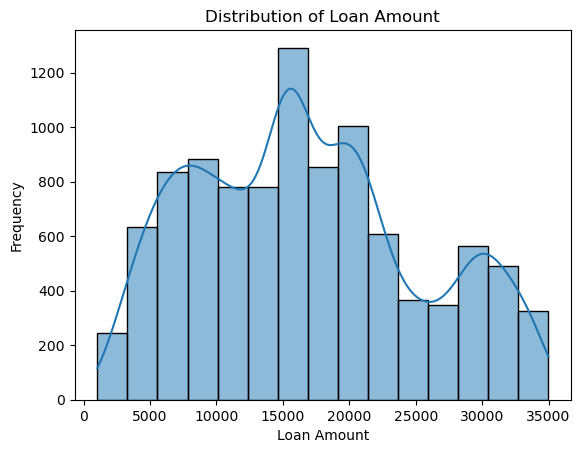

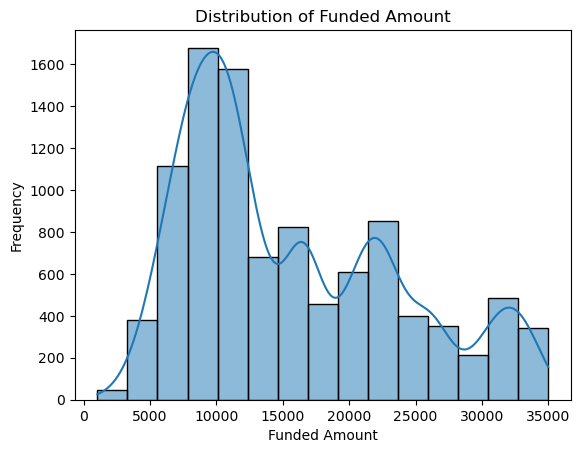

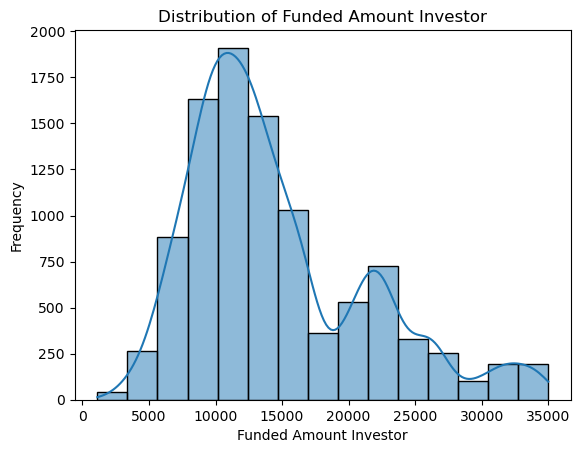

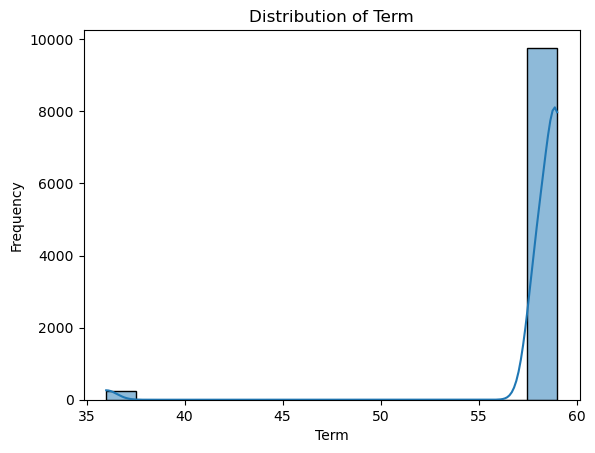

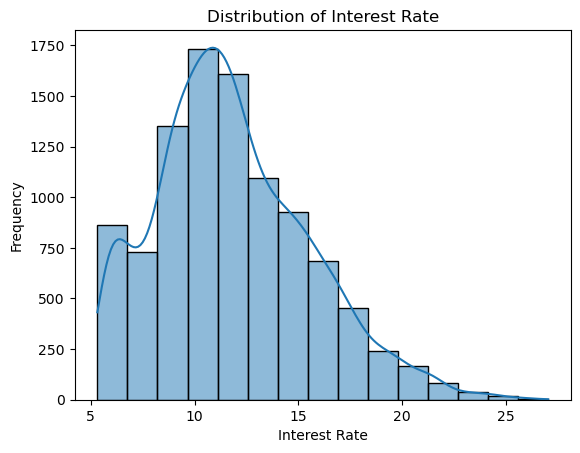

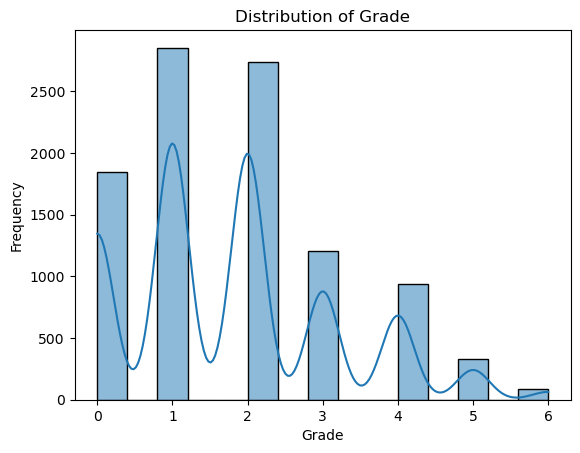

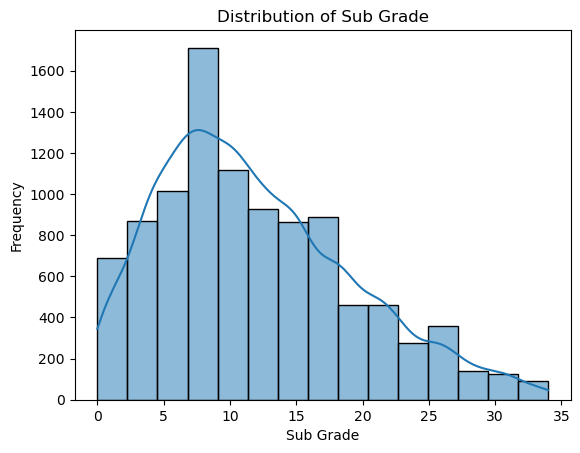

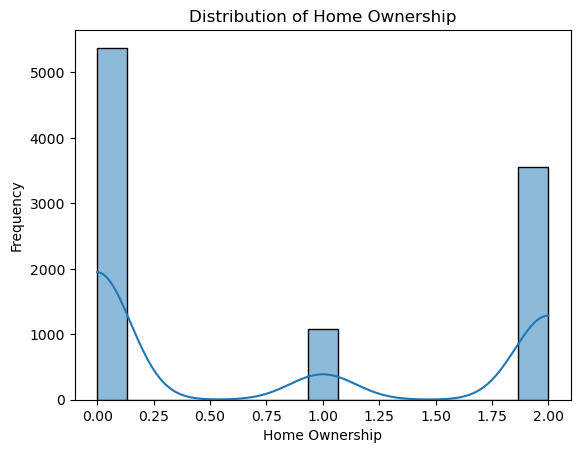

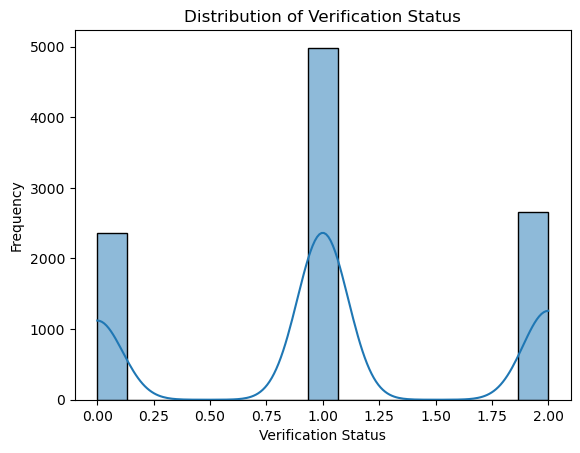

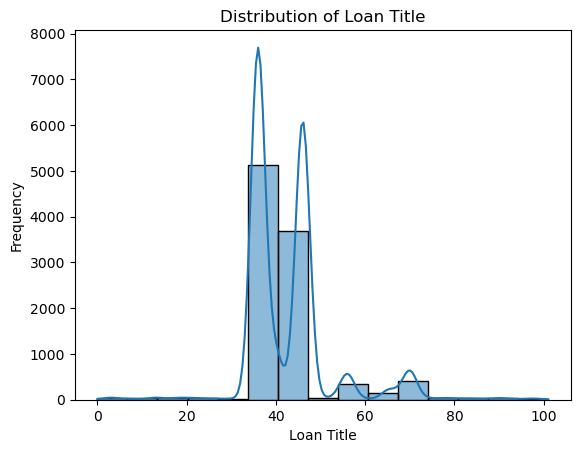

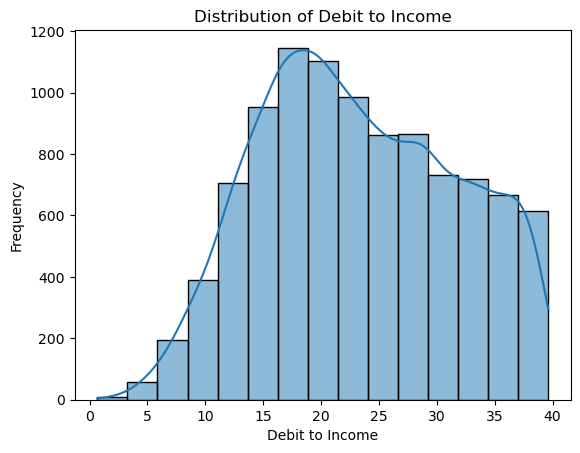

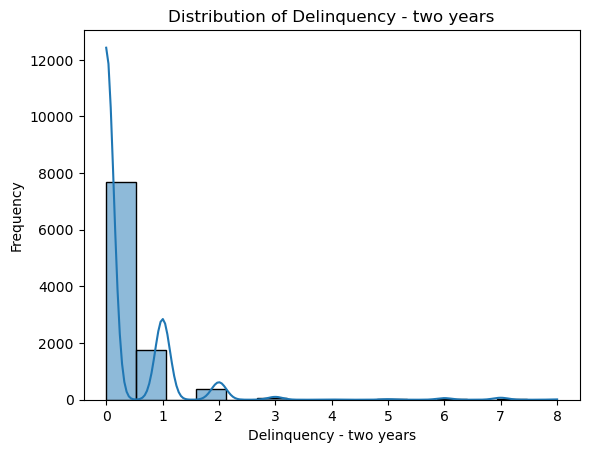

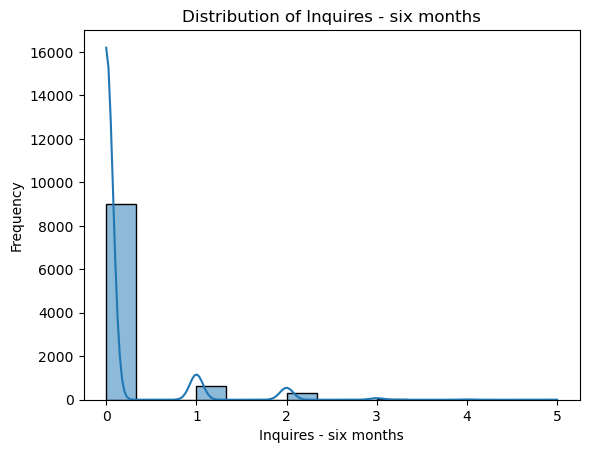

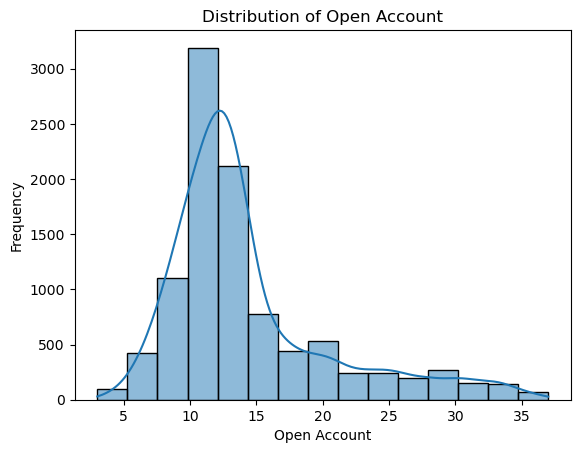

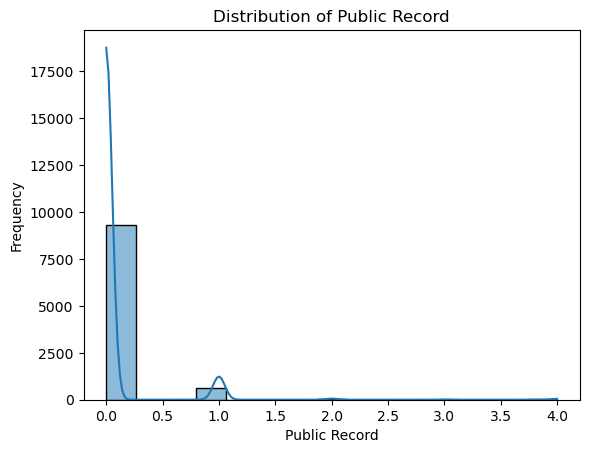

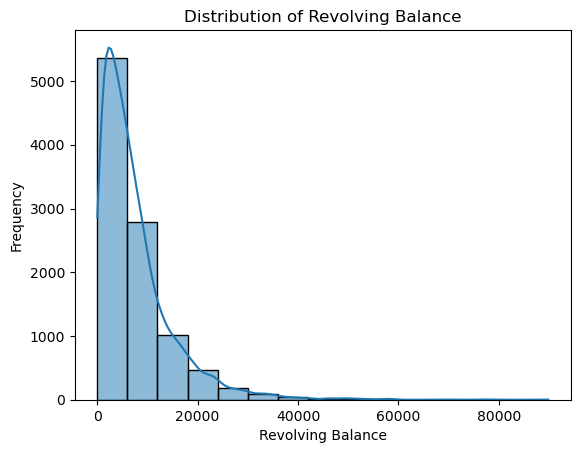

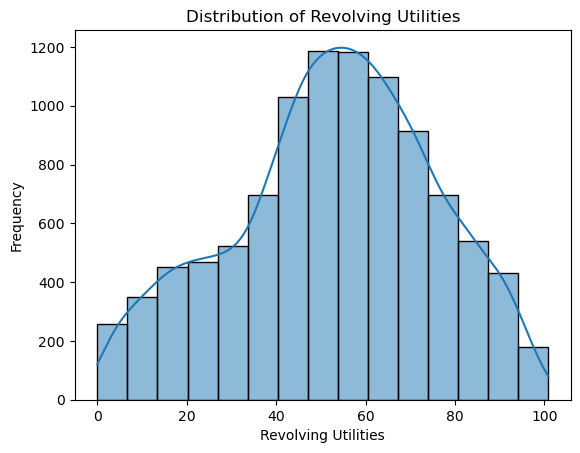

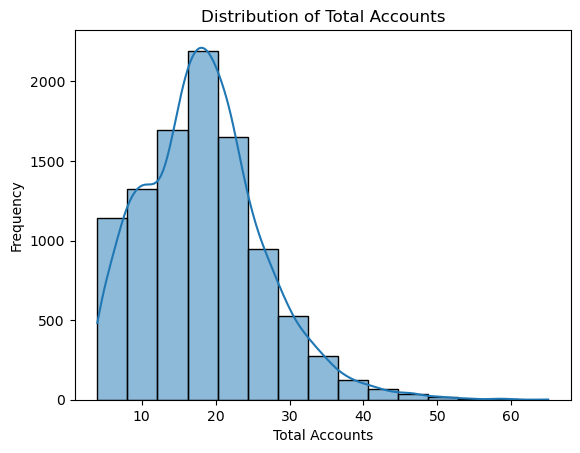

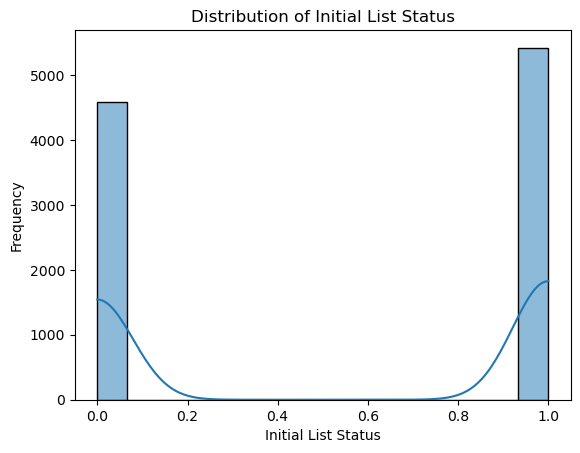

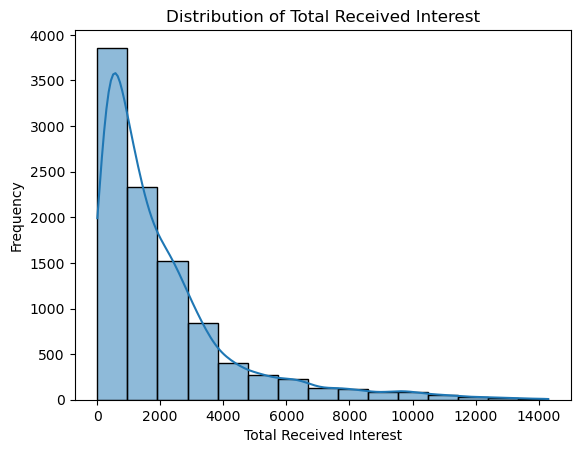

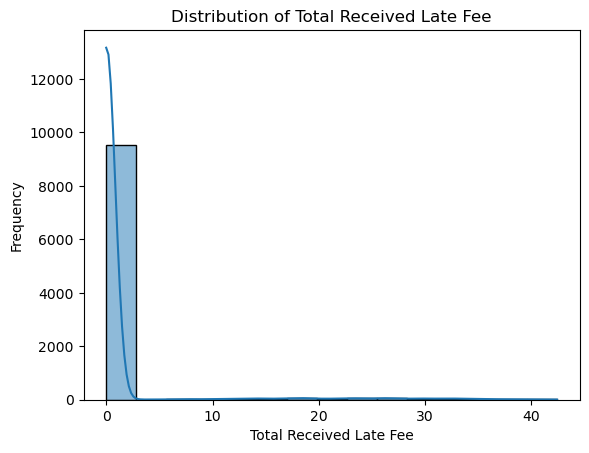

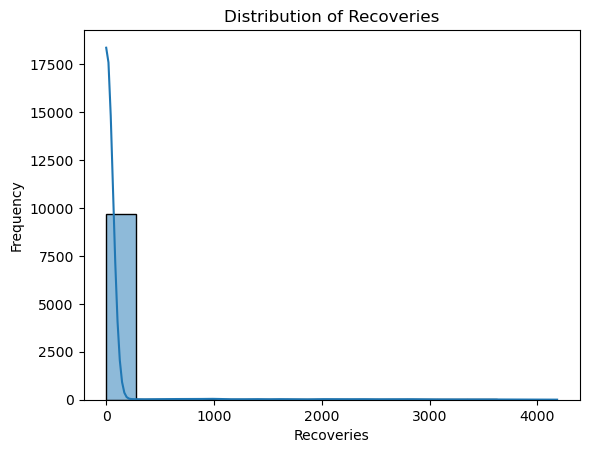

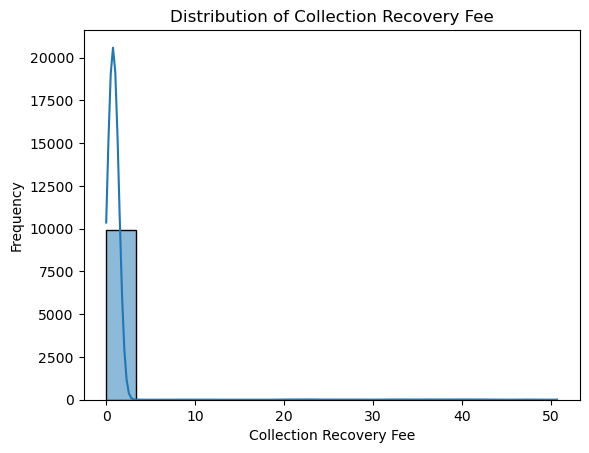

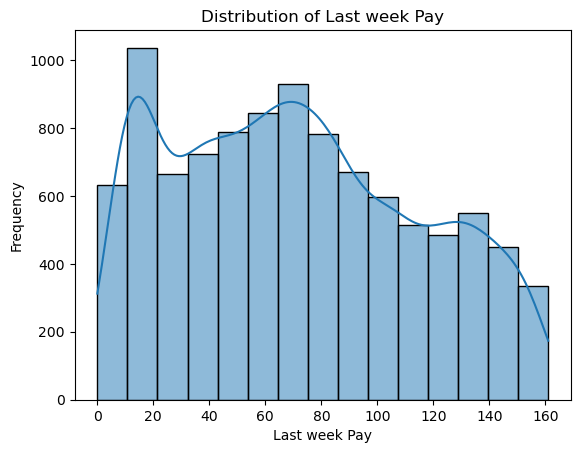

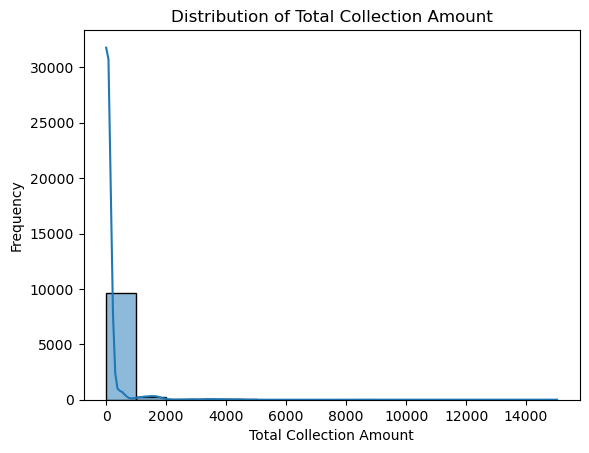

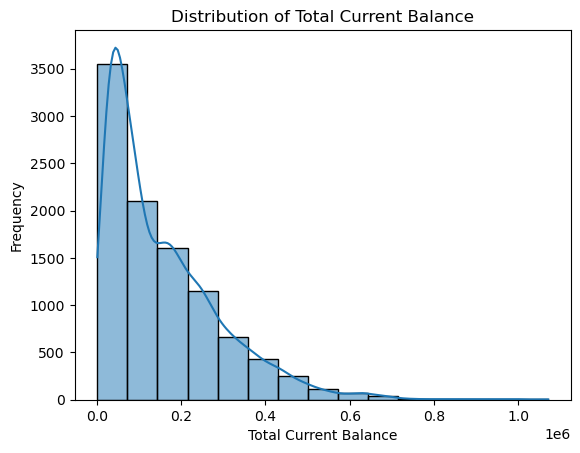

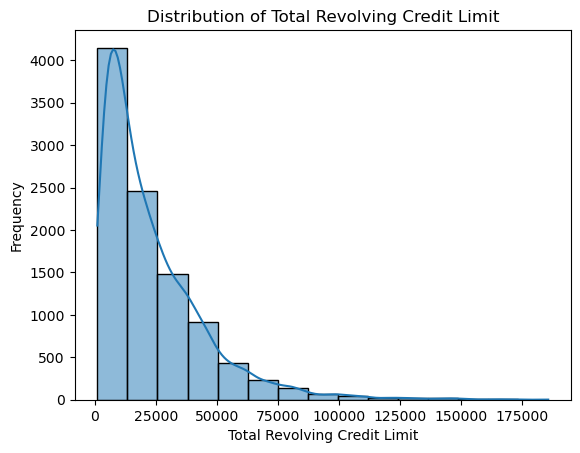

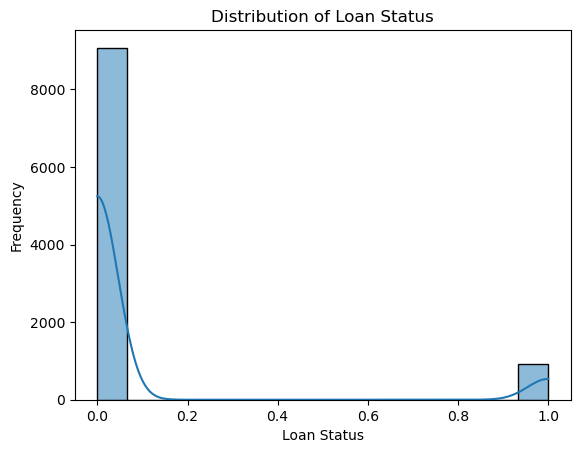

In [11]:
for column in df.columns:
    sns.histplot(df[column], kde=True, bins=15) 
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

We also look into correlations and we found there is no corrlation between different features, so there is no need to take it into consideration. Also, therotially, we should also drop features that contain data leakage,e.g. 'Total Received Late Fee'. It is helpful to predict the default, while the data is only available after we issue the loan. Therefore, at the moment we construct the loan, this information is not available from the clients. Therefore, this kind of data should also not be considered. However, our dataset is already small and the default is strongly imbalanced, we do not make any action on data leakage.

Now we will standardize and use the remaining data to predict. While decision tree is not sensitive the scales, KNN and SGD are the opposite. KNN measures the distance and SGD is used for linear models, so the scales need to be carefully chosen.. If we mix different scalers, we will end up with features in different ranges. After standardization, the scale becomes a normal distribution $N[0,1]$, but its range is still $(-\infty, \infty)$. On the other hand, if we use normalization, the range of features become $[0,1]$. This may lead the KNN and SGD results biased to some features, which is not intended. Since we have some features ,e.g. 'Distribution of Total Collection Amount', that has outliers significantly away from the mean, it is better to use standardization. Also it doesn't hurt to features that are already close to normal distribution. Therefore, we decide to standardize all features.

In [12]:
y = df['Loan Status'] 
x = df.drop(columns = ['Loan Status'])

In [13]:
scaler = StandardScaler()
x  = scaler.fit_transform(x)

# Training (30 points)
*10 points for correct code*

*10 points for interpretation results*

*10 points for pitfalls*

We've familiarized ourselves with the data, so now we're going to train some models.
A handful of frequently used models are: Decision Trees (DTC), Nearest Neighbors (KNN) and
Stochastic Gradient Descent learning algorithm (SGD).
Split the data into a training set and a test set, and train all mentioned models on the data.
For KNN, find the optimal number of neighbors. 
Use the test set to get the predicted values. Show the performance of the different models in a Confusion Matrix and compare the accuracy, precision, recall and F1-score.

When looking at the resulting measures and matrices, what stands out? What possible pitfalls may be hiding in each of the models?

Split the dataset into training and testing data. 30% of data are used for testing.

In [14]:
x_train, x_test,y_train, y_test= train_test_split(x, y, test_size = 0.3) 

Since the loss of a default is much higher than the profit of a good loan, recall is more reasonable to be optimized. We use grid search to find the parameters that maximize recall.

In [15]:
# model = DecisionTreeClassifier()
# parameters = {'criterion':["gini", "entropy", "log_loss"], 'max_depth':[None,2,5,10,20,100]
#              , 'class_weight':[{1:10},{1:5},{1:2},{1:1}]}
# grid_search = GridSearchCV(model, parameters,cv=5,verbose=1,scoring ='recall')
# grid_search.fit(x_train, y_train)
# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_
# print('Best parameter is',best_params)
# print('Best model is',best_model)

In [16]:
tree = DecisionTreeClassifier(criterion='entropy',class_weight = {1:10})
tree = tree.fit(x_train ,y_train)

Accuracy: 0.8237
Precision: 0.1036
Recall: 0.1127
F1 Score: 0.1079


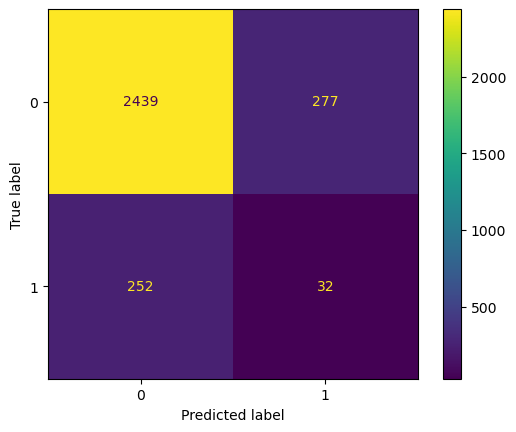

In [17]:
y_pred= tree.predict(x_test)
cm= confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
# print("          Predicted")
# print("          |   0   |   1   |")
# print(f"Actual 0  |  {cm[0, 0]:>3} |  {cm[0, 1]:>3}  |")
# print(f"        1 |  {cm[1, 0]:>3}  |  {cm[1, 1]:>3}  |")

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.4f}')
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.4f}')
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.4f}')

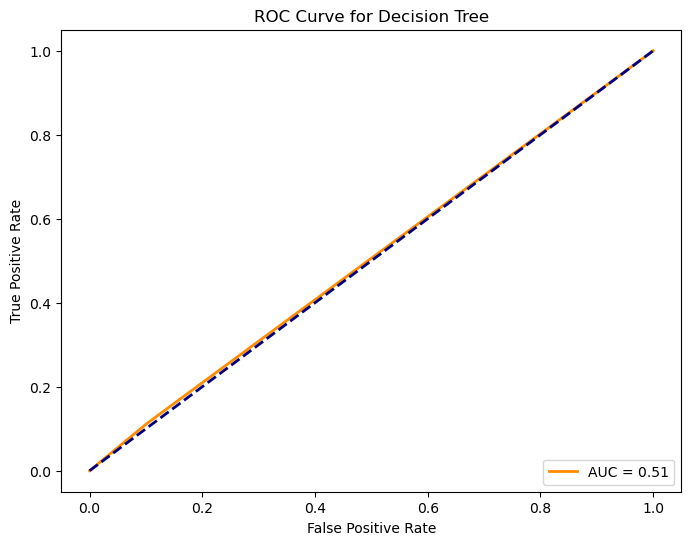

In [18]:
y_scores = tree.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend(loc='lower right')

In [19]:
KNN =  KNeighborsClassifier(n_neighbors=1, p=1)
KNN = KNN.fit(x_train ,y_train)

Accuracy: 0.8290
Precision: 0.0925
Recall: 0.0915
F1 Score: 0.0920


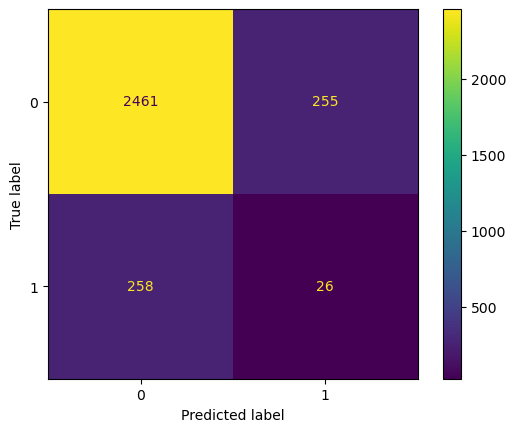

In [20]:
y_pred= KNN.predict(x_test)
cm= confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
# print("          Predicted")
# print("          |   0   |   1   |")
# print(f"Actual 0  |  {cm[0, 0]:>3} |  {cm[0, 1]:>3}  |")
# print(f"        1 |  {cm[1, 0]:>3}  |  {cm[1, 1]:>3}  |")

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.4f}')
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.4f}')
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.4f}')

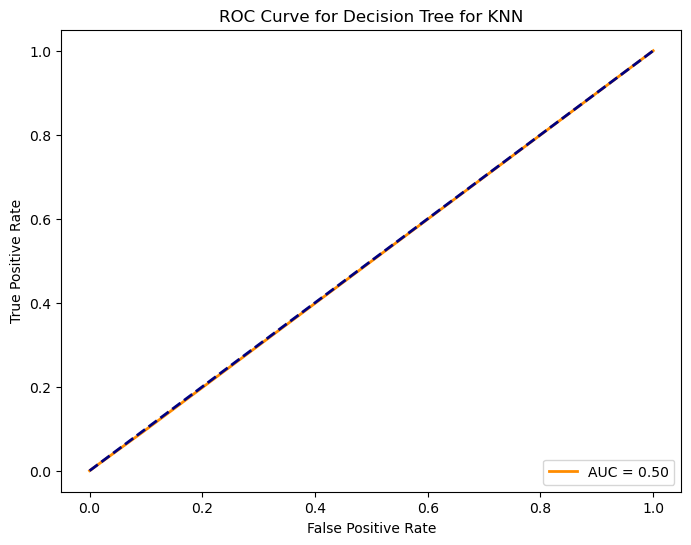

In [21]:
y_scores = KNN.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree for KNN')
plt.legend(loc='lower right')
plt.show()

In [22]:
# model = SGDClassifier()
# parameters = {'loss':['hinge','log_loss', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error'],
#               'penalty':['l2','l1','elasticnet', None],'alpha':[0.00001,0.0001,0.001,0.01,0.1,1]}
# grid_search = GridSearchCV(model, parameters,cv=5,verbose=1,scoring ='recall')
# grid_search.fit(x_train, y_train)
# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_
# print('Best parameter is',best_params)
# print('Best model is',best_model)

In [23]:
SGD=SGDClassifier(loss='squared_error',penalty = 'elasticnet',learning_rate = 'adaptive',eta0=0.0001,class_weight = {1:10})
SGD = SGD.fit(x_train ,y_train)

Accuracy: 0.5100
Precision: 0.0988
Recall: 0.5141
F1 Score: 0.1657


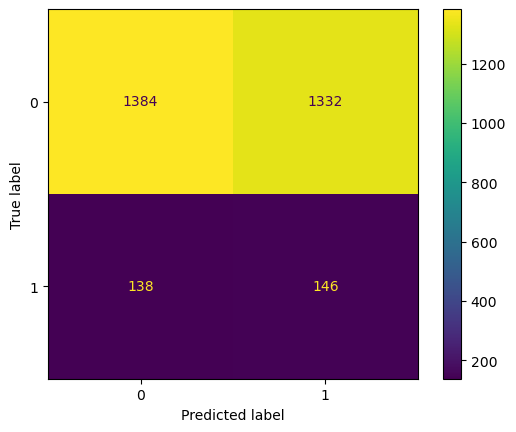

In [24]:
y_pred= SGD.predict(x_test)
cm= confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
# print("          Predicted")
# print("          |   0   |   1   |")
# print(f"Actual 0  |  {cm[0, 0]:>3} |  {cm[0, 1]:>3}  |")
# print(f"        1 |  {cm[1, 0]:>3}  |  {cm[1, 1]:>3}  |")

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.4f}')
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.4f}')
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.4f}')

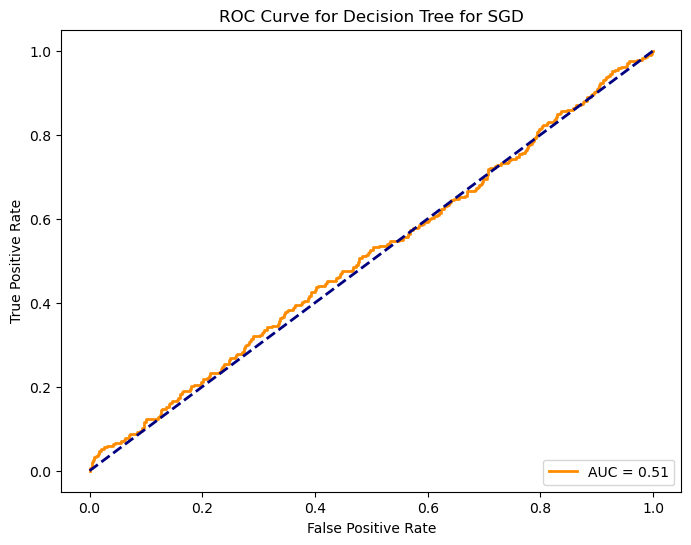

In [25]:
y_scores = SGD.decision_function(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree for SGD')
plt.legend(loc='lower right')
plt.show()

The confusion matrix and scores are shown after each model. From the model, it can be concluded that SGD show the best result as it has the highest precision, recall and F1 score. Also, the confusion matrix shows that the decision tree has the most predictive power as it still detects some default, while decision tree and KNN are basically not able to predict any default.

However, due to the limit of our data, it is difficult to compare the results. The sample size is not big enough and the loan status is imbalanced. Since 90% of clients do not default, we lack of data of default case for machine learning. Therefore, if we look into the ROC curve, we can conclude that all the models have no difference with random guess.

Pitfalls for decision tree:
- It is easy for the decision tree to be overfitted, especially when the tree is deep.
- Classification at each step only use 'local' information.

Pitfalls for KNN:
- It is sensitive to the outliers as it is a distance measure.
- The computational cost exponentially increases when k is large.
- KNN doesn't work well for high dimensions.

Pitfalls for SGD:
- The result can be converged to a local minimum instead of the global minimum.
- If the learning rate is too high, it may diverge instead of convergence. If the learning rate is too low, it converges very slow and it is easier to be converged to the local minimum.
- Since it is stochastic, the path of convergence is longer and make cause noise in the gradient estimation, so the learning speed is low.


# Feature Selection (35 points)
*10 points for correct code*

*15 points for correct reasoning and interpretation*

*10 points for explanation pitfalls*

Now that we've compared the performance of the different models, we place our judgement upon 
the dimensionality of the data. The dimension reduction methods discussed so far are 
L2 regularization and LASSO. Combining these methods gives us the Elastic Net method. What are some pitfalls of L2 regularization and of LASSO? How does Elastic Net overcome these pitfalls?

The Elastic Net method uses two parameters, l1_ratio and α. l1_ratio takes on a value between 0 and 1, and α a value higher than 0. Use the Elastic Net method to get an impression of the importance of the features, and make 
an appropriate and argumented decision regarding their individual inclusion.

Pitfall for L1 regularization:
- Since the L1 regularization uses the absolute value of weights, which means many weights are tend to be set to 0, so sometimes it may drops too many features out which are we want to use.
-  L1 regularization involves taking the absolute values of the weights, so it has no closed form solution, which means it is computationally expensive. 
- If there are two or more highly collinear variables then L1 regularization select one of them randomly which is not good for the interpretation of data.

Pitfall for L2 regularization:
- L2 regularization uses the sum of the squares of all the feature weights. So the weights never goes to 0, which may lead to a lot of tiny weights, so their is no feature selection.
- L2 regularization is sensitive to the outliers since it uses squared values, which may lead to drastical change for the conclusions. 

The elastic net combines L1 and L2 by setting the ratio to L1 and L2 and sum up weighted L1 and L2.It combines the advantages of L1 and L2 while the pitfalls of both L1 and L2 are less obvious. So elastic net is better than the single L1 or L2 regularization.

The l1 ratio is set to 0.5, so both l1 and l2 regularization are taken into consideration. Since the feature importance are very small in this case, we choose a small alpha to avoid all feature importance being 0.

Text(0.5, 1.0, 'Elastic Net Feature Importance Plot')

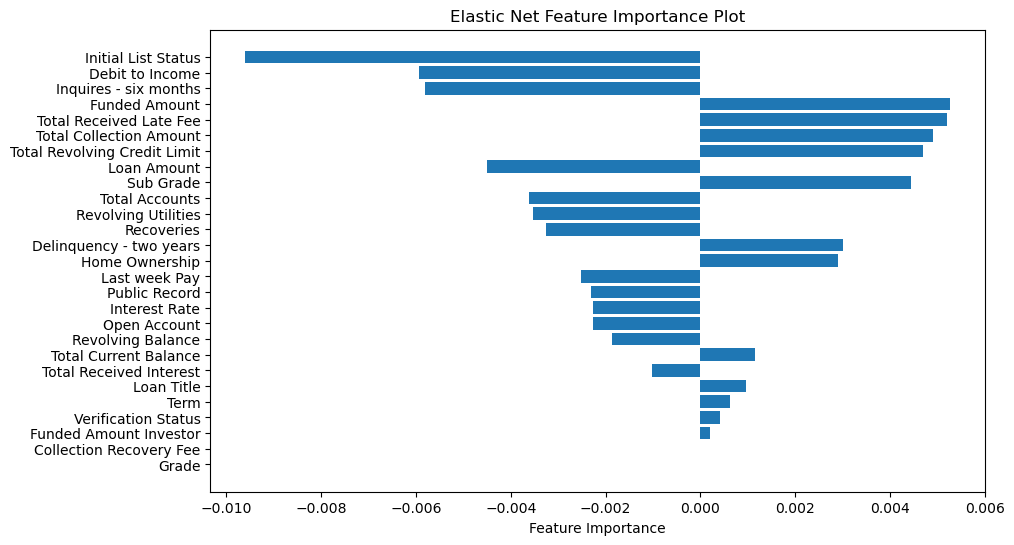

In [26]:
elastic_net = ElasticNet(alpha=0.0001, l1_ratio=0.5)
elastic_net.fit(x_train, y_train)
y_pred = elastic_net.predict(x_test)
feature_importance = elastic_net.coef_

sorted_features = sorted(zip(df.columns, feature_importance), key=lambda x: abs(x[1]))
sorted_feature_names, sorted_importance = zip(*sorted_features)

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_names)), sorted_importance)
plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
plt.xlabel('Feature Importance')
plt.title('Elastic Net Feature Importance Plot')

From the feature importance plot, we concluded that the weights are in general very small, but it can still be seen that some features are more important than others. The most important features are 'Initial List Status','Total Received Late Fee' and 'Rovolving Utilities'.

# Recommendation (10 points)
*10 points for paper*

Now that you've made an assessment of the key features and it is clear which model performs best, it is time to write a recommendation to Kiwibank. Explain what you have researched and present your results in a short paper in no more than 400 words. 

Focus on the bank's wants and needs, and minimize the technical talk. We recommend writing in LaTeX/Overleaf, but Word or another application is also fine. Hand the paper in as PDF, together with your Jupyter Notebook, in a ZIP-file.